In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 3000
dims = 2
X=[]
means=[]

#arbitrarily assigned K
k=5

for i in range(k):
    X.append(np.random.randn(N,dims)+np.random.randn(1,dims)*3.6)
    means.append(np.mean(X[-1],axis=0))
X=np.vstack(X)
means = np.vstack(means)

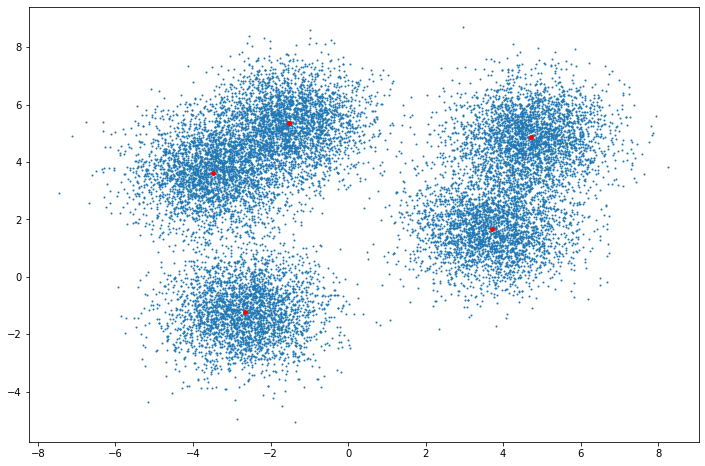

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

In [6]:
def Distance(x,means, *args,**kwargs):
    diff=[]
    dists=[]
    for mean in means:
        diff = x - mean
        dist = np.sqrt(np.sum(diff**2, axis=1, keepdims= True))
        dists.append(dist)

    return np.hstack(dists) 

For each point, 

Distance(X_12, means)<br>
out of <br>
(12,5,2)<br>

In [7]:
dist = Distance(X,means)
y_hat = np.argmin(dist, axis = 1)

In [8]:
dist.shape

(15000, 5)

In [9]:
y_hat

array([0, 0, 0, ..., 4, 4, 4])

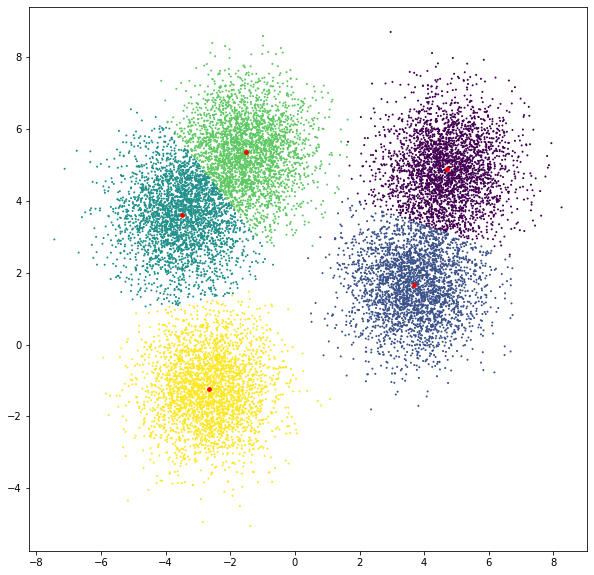

In [10]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=14)

## Changing the new mean point, or centroid

In [11]:
k = 5

In [12]:
indices = np.arange(X.shape[0])
sample_indices = np.random.choice(indices, size=k, replace = False)
# picking points based on the random 5

In [13]:
means = X[sample_indices]

In [14]:
means

array([[ 2.14222109,  3.7849478 ],
       [ 1.86756778,  1.29525132],
       [-2.10992887,  5.94130509],
       [-1.92959087, -1.00436572],
       [ 2.81018246,  1.77985067]])

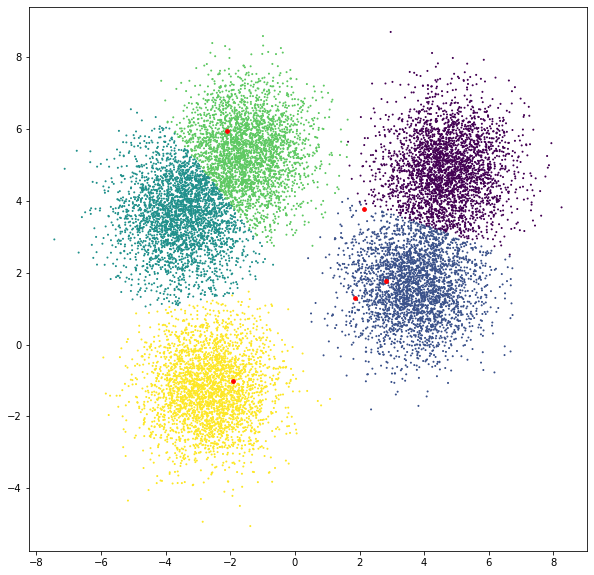

In [15]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=14)

## Now applying the distance formula and getting the estimated clustering for the new centroids

In [16]:
dist = Distance(X,means)
y_hat = np.argmin(dist, axis = 1)

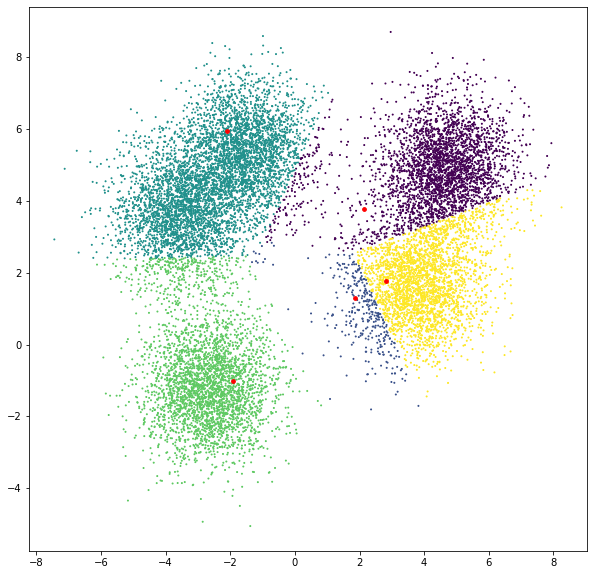

In [17]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=14)

### Calcuating the new means

In [18]:
means = []
for i in range(k):
    mean = np.mean(X[y_hat==i], axis = 0) # for every x where the y_hat is i, aka the number of k 
    means.append(mean)
    
means = np.vstack(means)

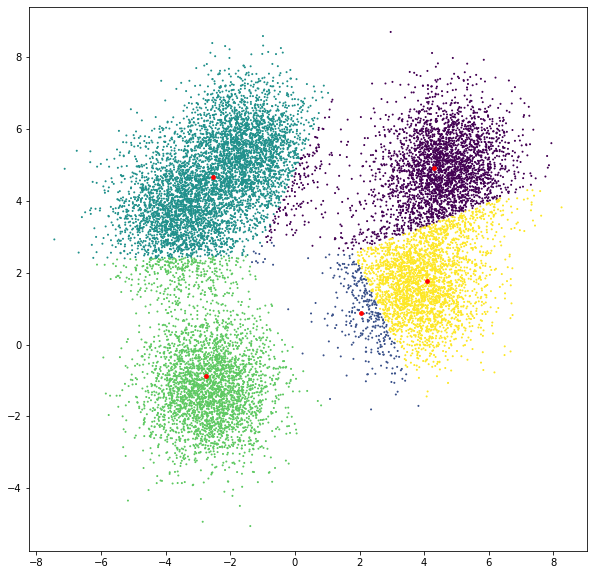

In [19]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=14)

In [20]:
means = []
for i in range(k):
    mean = np.mean(X[y_hat==i], axis = 0) # for every x where the y_hat is i, aka the number of k 
    means.append(mean)
    
means = np.vstack(means)

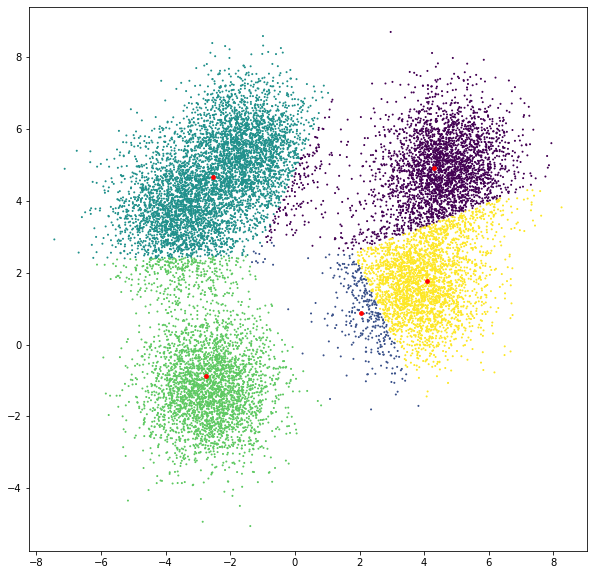

In [21]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=14)

## K-Means Class

In [22]:
def KMeans(X,k,iterations =3):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=k,replace=False)
    means = X[sample_indices]
    
    for i in range(iterations):
        dist = Distance(X,means)
        y_hat = np.argmin(dist, axis = 1)
        means = []
        
        for n in range(k):
            mean = np.mean(X[y_hat == n],axis = 0)
            means.append(mean)
        means = np.vstack(means)
        
    dist = Distance(X,means)
    y_hat = np.argmin(dist, axis = 1)
    return(y_hat,means)
        

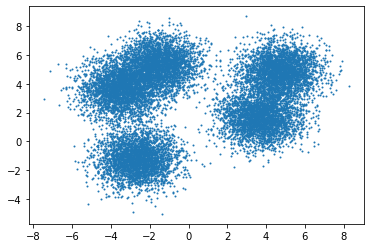

In [23]:
plt.scatter(X[:,0],X[:,1],s=1)

In [24]:
y_hat, means = KMeans(X,8, iterations  = 6)

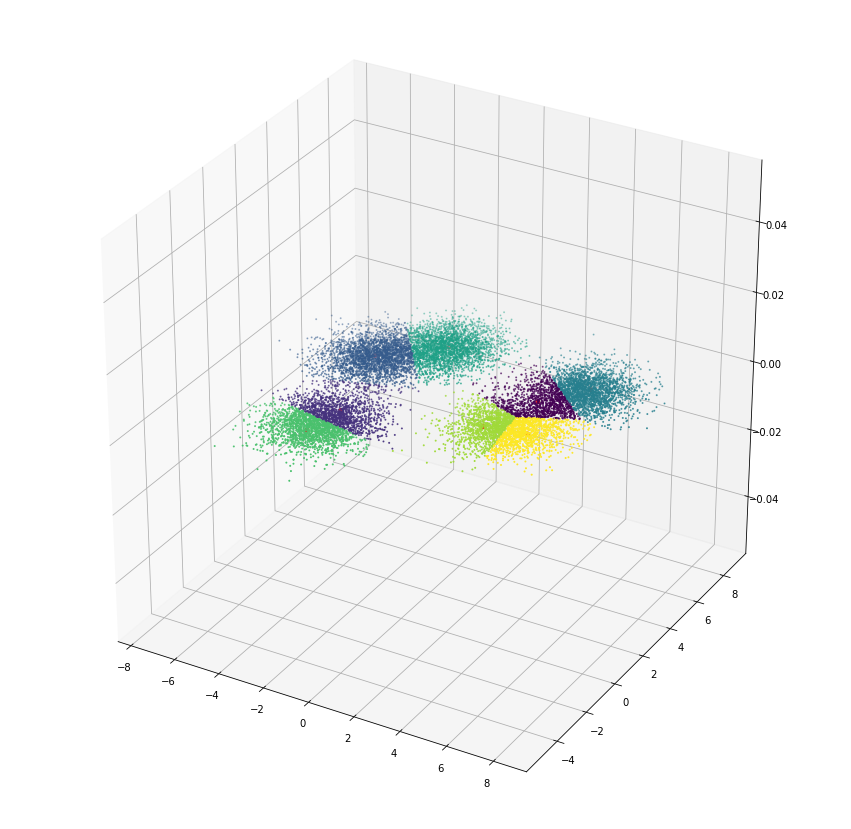

In [25]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
plt.scatter(means[:,0],means[:,1], c='r',s=15)

could use this with the words we have... 


Now we are going to implement something called responsibility

#Responsibility

# $ r_{i,k} =\frac {e^{-\beta || x_i - m_k ||^2}}{\sum_{i=0}^{N} e^{-\beta || x_i -m_k|| ^2}} $

# Weighted Arithmetic Mean

#$m_k =\frac {\sum_{i=1}^N r_{i,k}  x_i}{\sum_s r_{s,k}}$

In [56]:
def Responsibility(X, means, beta = 1e-3, *args,**kwargs):
    diff = []
    responsibilities = []
    
    for mean in means:
        diff = X - mean
        dist = np.sum(diff**2,axis = 1, keepdims = True)
        
        numerator = np.exp(-beta*dist)
        denominator = np.sum(numerator)
        
        respinsibility = -numerator/denominator
        responsibilities.append(respinsibility)
        
    return np.hstack(responsibilities)

In [62]:
class K_Means:
    def __init__(self,k,distance_func =Distance, beta = None):
        self.k = k
        self.distance_func = distance_func
        self.beta = beta
        
    def Fit(self, X, iterations = 5):
        # find centroids
        # classify everything in train
        # finding clusters
        indices = np.arange(X.shape[0])
        sample_indices = np.random.choice(indices, size = self.k , replace = False)
        self.means = X[sample_indices]
        

        for i in range(iterations):
            y_hat = self.Predict(X)
            self.means = []
            
            for j in range(self.k):
                mean = np.mean(X[y_hat == j], axis = 0)
                self.means.append(mean)
            self.means = np.vstack(self.means)
        
        y_hat = self.Predict(X)
        
        #plt.scatter(X[:,0],X[:,1],s=1, c = y_hat)
        #plt.scatter(means[:,0],means[:,1], c='r',s=14)


        plt.figure(figsize = (10,7))
        plt.scatter(X[:,0],X[:,1], s=1,c=y_hat)
        plt.scatter(self.means[:,0],self.means[:,1], c = "r", s=14)
        return y_hat

    def Predict(self, X):
        # trying to find which clusters youre in 
        dist = self.distance_func(X,self.means, self.beta)
        y_hat = np.argmin(dist, axis=1)
        print(dist)
        return y_hat
    
    
# fit finds the clusers

In [63]:
softK = K_Means(5,distance_func =Responsibility, beta = 5 )

[[-3.23578868e-006 -4.23953689e-165 -1.29327251e-023 -3.41749581e-105
  -2.82611996e-024]
 [-6.03888418e-003 -5.37482972e-204 -1.23795601e-040 -1.13031991e-139
  -9.96012940e-041]
 [-3.79966670e-008 -3.93231355e-276 -8.13264248e-073 -4.52175316e-201
  -2.87954913e-071]
 ...
 [-6.72814917e-310 -1.26694412e-058 -1.00116940e-130 -3.10190155e-042
  -5.27472805e-137]
 [-1.08541716e-269 -5.39560666e-050 -2.94305310e-105 -5.66181921e-030
  -4.77851104e-111]
 [-9.29119476e-235 -1.40943921e-044 -4.76376942e-084 -4.00569040e-021
  -2.25371343e-089]]
[[-2.47914580e-004 -1.83351869e-125 -4.14077017e-018 -1.26747700e-124
  -1.17127854e-029]
 [-1.38807004e-004 -3.21702061e-157 -3.08458574e-033 -1.13500118e-162
  -5.77678773e-044]
 [-2.49534748e-013 -1.06919503e-219 -1.27261159e-065 -4.27928486e-228
  -4.27971852e-069]
 ...
 [-4.68565980e-274 -3.39398659e-088 -3.91517824e-143 -3.27072787e-027
  -1.46486374e-163]
 [-2.62227399e-236 -2.29942201e-074 -1.57819021e-116 -1.76606988e-017
  -8.02328369e-136]

array([0, 0, 0, ..., 3, 3, 3])

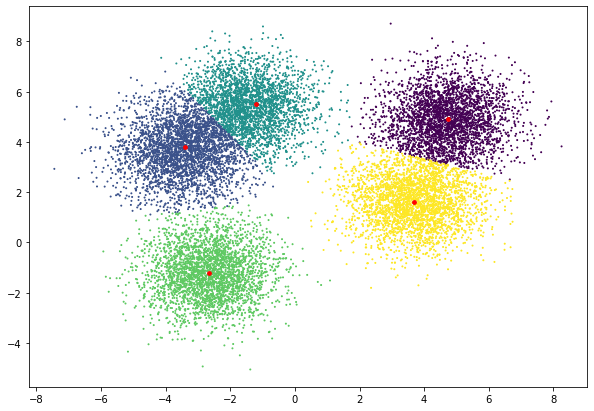

In [64]:
softK.Fit(X,iterations = 5)